In [1]:
# @SaiSurisetti: Script to install and import numpy, pandas, matplotlib, seaborn, scikit-learn, pickle, joblib
%pip install numpy pandas matplotlib seaborn scikit-learn joblib kagglehub category_encoders

# @SaiSurisetti: Import numpy, pandas, matplotlib, seaborn, scikit-learn, pickle, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder

Note: you may need to restart the kernel to use updated packages.


In [2]:
# @SaiSurisetti: Load the dataset
train_data_path = "data/Training.csv"
test_data_path = "data/Testing.csv"

# @SaiSurisetti: Print the loaded dataset
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Remove the 'Unnamed: 133' column from the training data
train_data = train_data.loc[:, ~train_data.columns.str.contains('^Unnamed')]

# Verifying that the columns match after removal
print("Training columns after cleanup:", train_data.columns)
print("Testing columns after cleanup:", test_data.columns)

# Check if the columns of both data sets match
if train_data.columns.equals(test_data.columns):
    print("Columns match. You can proceed with model training.")
else:
    print("Columns still do not match. Further investigation needed.")

'''
@SaiSurisetti: The training_data looks something like:

itching	skin_rash	nodal_skin_eruptions	continuous_sneezing	shivering	chills	joint_pain	stomach_pain	acidity	ulcers_on_tongue	muscle_wasting	vomiting	burning_micturition	spotting_ urination	fatigue	weight_gain	anxiety	cold_hands_and_feets	mood_swings	weight_loss	restlessness	lethargy	patches_in_throat	irregular_sugar_level	cough	high_fever	sunken_eyes	breathlessness	sweating	dehydration	indigestion	headache	yellowish_skin	dark_urine	nausea	loss_of_appetite	pain_behind_the_eyes	back_pain	constipation	abdominal_pain	diarrhoea	mild_fever	yellow_urine	yellowing_of_eyes	acute_liver_failure	fluid_overload	swelling_of_stomach	swelled_lymph_nodes	malaise	blurred_and_distorted_vision	phlegm	throat_irritation	redness_of_eyes	sinus_pressure	runny_nose	congestion	chest_pain	weakness_in_limbs	fast_heart_rate	pain_during_bowel_movements	pain_in_anal_region	bloody_stool	irritation_in_anus	neck_pain	dizziness	cramps	bruising	obesity	swollen_legs	swollen_blood_vessels	puffy_face_and_eyes	enlarged_thyroid	brittle_nails	swollen_extremeties	excessive_hunger	extra_marital_contacts	drying_and_tingling_lips	slurred_speech	knee_pain	hip_joint_pain	muscle_weakness	stiff_neck	swelling_joints	movement_stiffness	spinning_movements	loss_of_balance	unsteadiness	weakness_of_one_body_side	loss_of_smell	bladder_discomfort	foul_smell_of urine	continuous_feel_of_urine	passage_of_gases	internal_itching	toxic_look_(typhos)	depression	irritability	muscle_pain	altered_sensorium	red_spots_over_body	belly_pain	abnormal_menstruation	dischromic _patches	watering_from_eyes	increased_appetite	polyuria	family_history	mucoid_sputum	rusty_sputum	lack_of_concentration	visual_disturbances	receiving_blood_transfusion	receiving_unsterile_injections	coma	stomach_bleeding	distention_of_abdomen	history_of_alcohol_consumption	fluid_overload	blood_in_sputum	prominent_veins_on_calf	palpitations	painful_walking	pus_filled_pimples	blackheads	scurring	skin_peeling	silver_like_dusting	small_dents_in_nails	inflammatory_nails	blister	red_sore_around_nose	yellow_crust_ooze	prognosis
1	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	Fungal infection
0	0	0	1	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	Allergy
0	0	0	0	0	0	0	1	1	1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	GERD
1	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	1	1	0	0	0	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	Chronic cholestasis
'''

'''
@SaiSurisetti: The testing_data looks something like:

itching	skin_rash	nodal_skin_eruptions	continuous_sneezing	shivering	chills	joint_pain	stomach_pain	acidity	ulcers_on_tongue	muscle_wasting	vomiting	burning_micturition	spotting_ urination	fatigue	weight_gain	anxiety	cold_hands_and_feets	mood_swings	weight_loss	restlessness	lethargy	patches_in_throat	irregular_sugar_level	cough	high_fever	sunken_eyes	breathlessness	sweating	dehydration	indigestion	headache	yellowish_skin	dark_urine	nausea	loss_of_appetite	pain_behind_the_eyes	back_pain	constipation	abdominal_pain	diarrhoea	mild_fever	yellow_urine	yellowing_of_eyes	acute_liver_failure	fluid_overload	swelling_of_stomach	swelled_lymph_nodes	malaise	blurred_and_distorted_vision	phlegm	throat_irritation	redness_of_eyes	sinus_pressure	runny_nose	congestion	chest_pain	weakness_in_limbs	fast_heart_rate	pain_during_bowel_movements	pain_in_anal_region	bloody_stool	irritation_in_anus	neck_pain	dizziness	cramps	bruising	obesity	swollen_legs	swollen_blood_vessels	puffy_face_and_eyes	enlarged_thyroid	brittle_nails	swollen_extremeties	excessive_hunger	extra_marital_contacts	drying_and_tingling_lips	slurred_speech	knee_pain	hip_joint_pain	muscle_weakness	stiff_neck	swelling_joints	movement_stiffness	spinning_movements	loss_of_balance	unsteadiness	weakness_of_one_body_side	loss_of_smell	bladder_discomfort	foul_smell_of urine	continuous_feel_of_urine	passage_of_gases	internal_itching	toxic_look_(typhos)	depression	irritability	muscle_pain	altered_sensorium	red_spots_over_body	belly_pain	abnormal_menstruation	dischromic _patches	watering_from_eyes	increased_appetite	polyuria	family_history	mucoid_sputum	rusty_sputum	lack_of_concentration	visual_disturbances	receiving_blood_transfusion	receiving_unsterile_injections	coma	stomach_bleeding	distention_of_abdomen	history_of_alcohol_consumption	fluid_overload	blood_in_sputum	prominent_veins_on_calf	palpitations	painful_walking	pus_filled_pimples	blackheads	scurring	skin_peeling	silver_like_dusting	small_dents_in_nails	inflammatory_nails	blister	red_sore_around_nose	yellow_crust_ooze	prognosis	
1	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	Fungal infection	
0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	Fungal infection	
1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	Fungal infection	
1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	Fungal infection	
'''


Training columns after cleanup: Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
Testing columns after cleanup: Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
Columns match. You can proceed with model training.


'\n@SaiSurisetti: The testing_data looks something like:\n\nitching\tskin_rash\tnodal_skin_eruptions\tcontinuous_sneezing\tshivering\tchills\tjoint_pain\tstomach_pain\tacidity\tulcers_on_tongue\tmuscle_wasting\tvomiting\tburning_micturition\tspotting_ urination\tfatigue\tweight_gain\tanxiety\tcold_hands_and_feets\tmood_swings\tweight_loss\trestlessness\tlethargy\tpatches_in_throat\tirregular_sugar_level\tcough\thigh_fever\tsunken_eyes\tbreathlessness\tsweating\tdehydration\tindigestion\theadache\tyellowish_skin\tdark_urine\tnausea\tloss_of_appetite\tpain_behind_the_eyes\tback_pain\tconstipation\tabdominal_pain\tdiarrhoea\tmild_fever\tyellow_urine\tyellowing_of_eyes\tacute_liver_failure\tfluid_overload\tswelling_of_stomach\tswelled_lymph_nodes\tmalaise\tblurred_and_distorted_vision\tphlegm\tthroat_irritation\tredness_of_eyes\tsinus_pressure\trunny_nose\tcongestion\tchest_pain\tweakness_in_limbs\tfast_heart_rate\tpain_during_bowel_movements\tpain_in_anal_region\tbloody_stool\tirritation_

Decision Tree Classifier Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00     

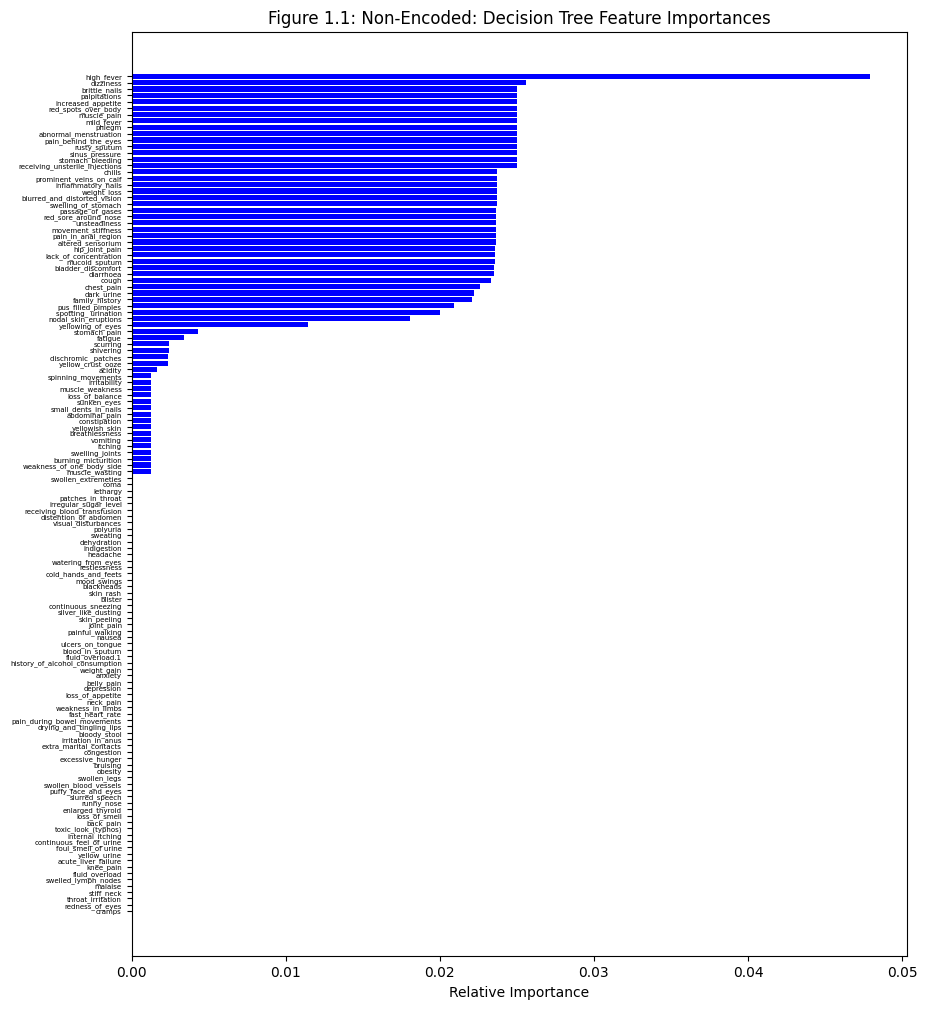

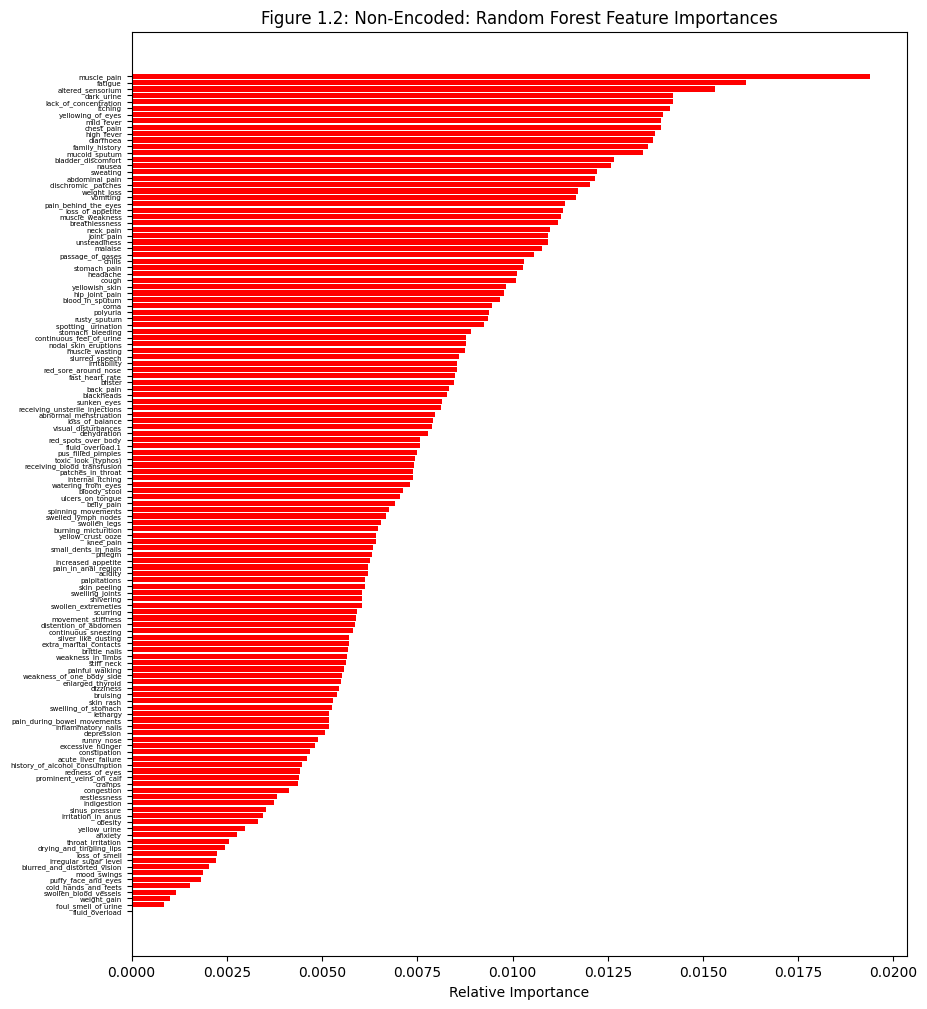

In [3]:
# Prepare training and testing data
X_train = train_data.drop('prognosis', axis=1)
y_train = train_data['prognosis']
X_test = test_data.drop('prognosis', axis=1)
y_test = test_data['prognosis']

# Initialize and train the Decision Tree Classifier
no_encoded_dtc_model = DecisionTreeClassifier()
no_encoded_dtc_model.fit(X_train, y_train)
dtc_predictions = no_encoded_dtc_model.predict(X_test)

# Initialize and train the Random Forest Classifier
no_encoded_rfc_model = RandomForestClassifier()
no_encoded_rfc_model.fit(X_train, y_train)
rfc_predictions = no_encoded_rfc_model.predict(X_test)

# Evaluation Metrics
print("Decision Tree Classifier Report:")
print(classification_report(y_test, dtc_predictions))
print("Random Forest Classifier Report:")
print(classification_report(y_test, rfc_predictions))

# Export the above into CSV files.
dtc_report = classification_report(y_test, dtc_predictions, output_dict=True)
dtc_report_df = pd.DataFrame(dtc_report).transpose()
dtc_report_df.to_csv("evaluation/no_encoded_dtc_evaluation.csv")

rfc_report = classification_report(y_test, rfc_predictions, output_dict=True)
rfc_report_df = pd.DataFrame(rfc_report).transpose()
rfc_report_df.to_csv("evaluation/no_encoded_rfc_evaluation.csv")

# Save the models
joblib.dump(no_encoded_dtc_model, 'production/no_encoded_dtc_model.pkl')
joblib.dump(no_encoded_rfc_model, 'production/no_encoded_rfc_model.pkl')

# Feature Importance for Decision Tree
dtc_features = X_train.columns
dtc_importances = no_encoded_dtc_model.feature_importances_
dtc_indices = np.argsort(dtc_importances)

plt.figure(figsize=(10, 12))
plt.title('Figure 1.1: Non-Encoded: Decision Tree Feature Importances')
plt.barh(range(len(dtc_indices)), dtc_importances[dtc_indices], color='b', align='center')
plt.yticks(range(len(dtc_indices)), [dtc_features[i] for i in dtc_indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/no_encoded_dtc_feature_importances.png')
plt.show()



# Feature Importance for Random Forest
rfc_features = X_train.columns
rfc_importances = no_encoded_rfc_model.feature_importances_
rfc_indices = np.argsort(rfc_importances)

plt.figure(figsize=(10, 12))
plt.title('Figure 1.2: Non-Encoded: Random Forest Feature Importances')
plt.barh(range(len(rfc_indices)), rfc_importances[rfc_indices], color='r', align='center')
plt.yticks(range(len(rfc_indices)), [rfc_features[i] for i in rfc_indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/no_encoded_rfc_feature_importances.png')
plt.show()



Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00     

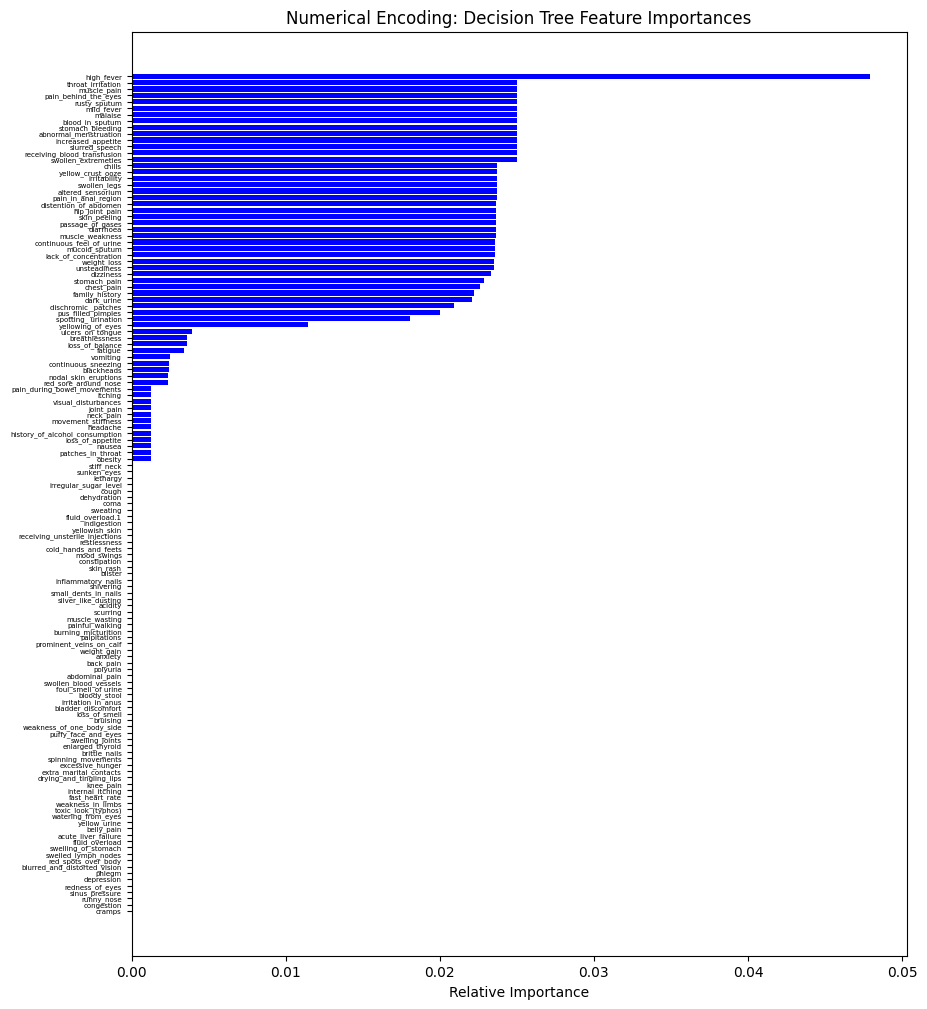

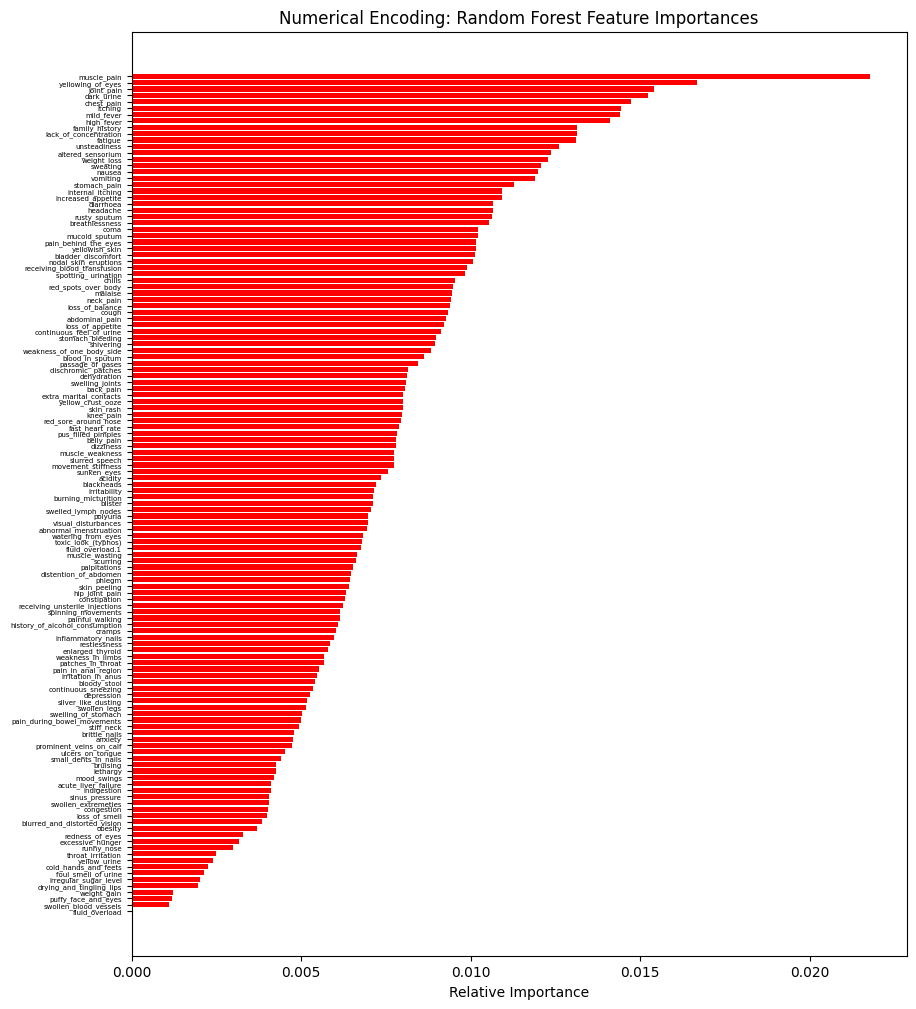

In [4]:
# Encode categorical variables numerically
label_encoder = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = label_encoder.fit_transform(train_data[column])
        test_data[column] = label_encoder.transform(test_data[column])

# Prepare training and testing data
X_train = train_data.drop('prognosis', axis=1)
y_train = train_data['prognosis']
X_test = test_data.drop('prognosis', axis=1)
y_test = test_data['prognosis']

# Initialize and train the Decision Tree Classifier
numerical_encoded_dtc_model = DecisionTreeClassifier()
numerical_encoded_dtc_model.fit(X_train, y_train)
dtc_predictions = numerical_encoded_dtc_model.predict(X_test)

# Initialize and train the Random Forest Classifier
numerical_encoded_rfc_model = RandomForestClassifier()
numerical_encoded_rfc_model.fit(X_train, y_train)
rfc_predictions = numerical_encoded_rfc_model.predict(X_test)

# Evaluation Metrics
print("Decision Tree Classifier Report:")
print(classification_report(y_test, dtc_predictions))
print("Random Forest Classifier Report:")
print(classification_report(y_test, rfc_predictions))


# Export the above into CSV files.
dtc_report = classification_report(y_test, dtc_predictions, output_dict=True)
dtc_report_df = pd.DataFrame(dtc_report).transpose()
dtc_report_df.to_csv("evaluation/numerical_encoded_dtc_evaluation.csv")

rfc_report = classification_report(y_test, rfc_predictions, output_dict=True)
rfc_report_df = pd.DataFrame(rfc_report).transpose()
rfc_report_df.to_csv("evaluation/numerical_encoded_rfc_evaluation.csv")

# Save the models
joblib.dump(numerical_encoded_dtc_model, 'production/numerical_encoded_dtc_model.pkl')
joblib.dump(numerical_encoded_rfc_model, 'production/numerical_encoded_rfc_model.pkl')

# Feature Importance for Decision Tree
features = X_train.columns
importances = numerical_encoded_dtc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title('Numerical Encoding: Decision Tree Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/numerical_encoded_dtc_feature_importances.png')
plt.show()

# Feature Importance for Random Forest
importances = numerical_encoded_rfc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title('Numerical Encoding: Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/numerical_encoded_rfc_feature_importances.png')
plt.show()

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00     

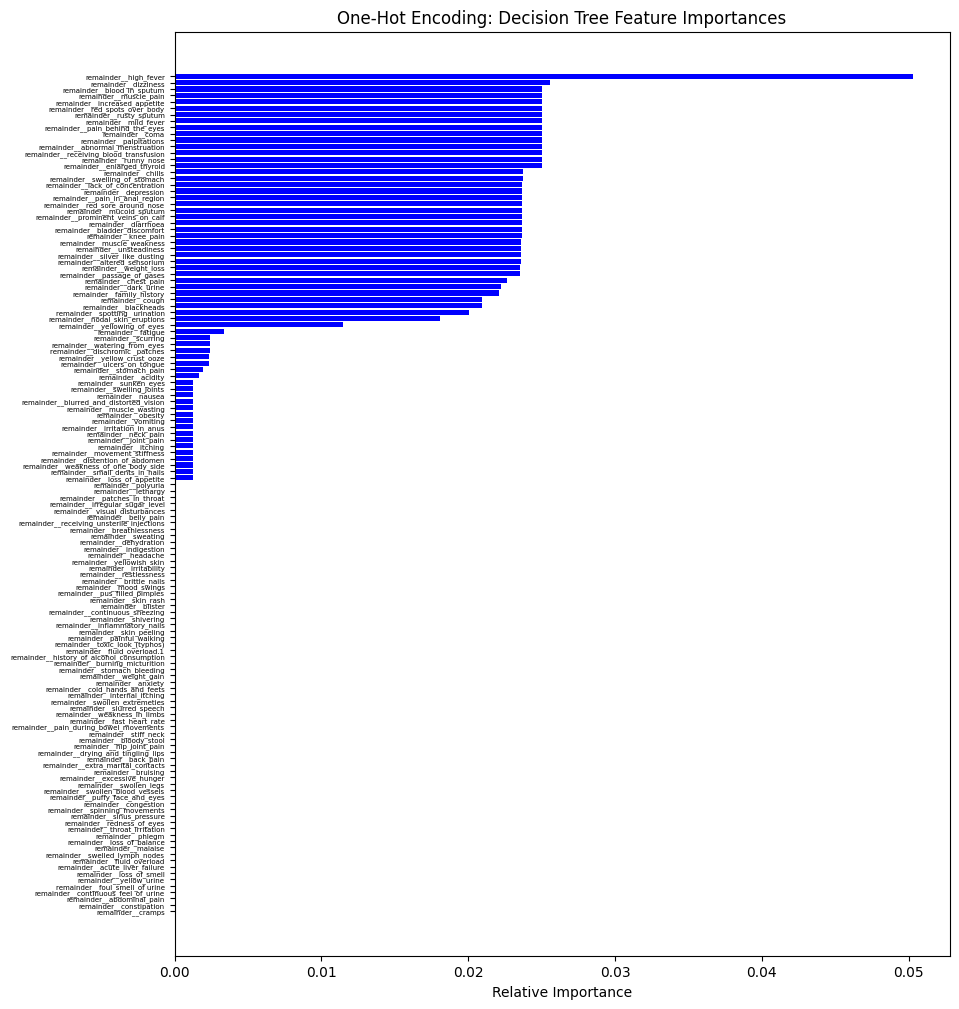

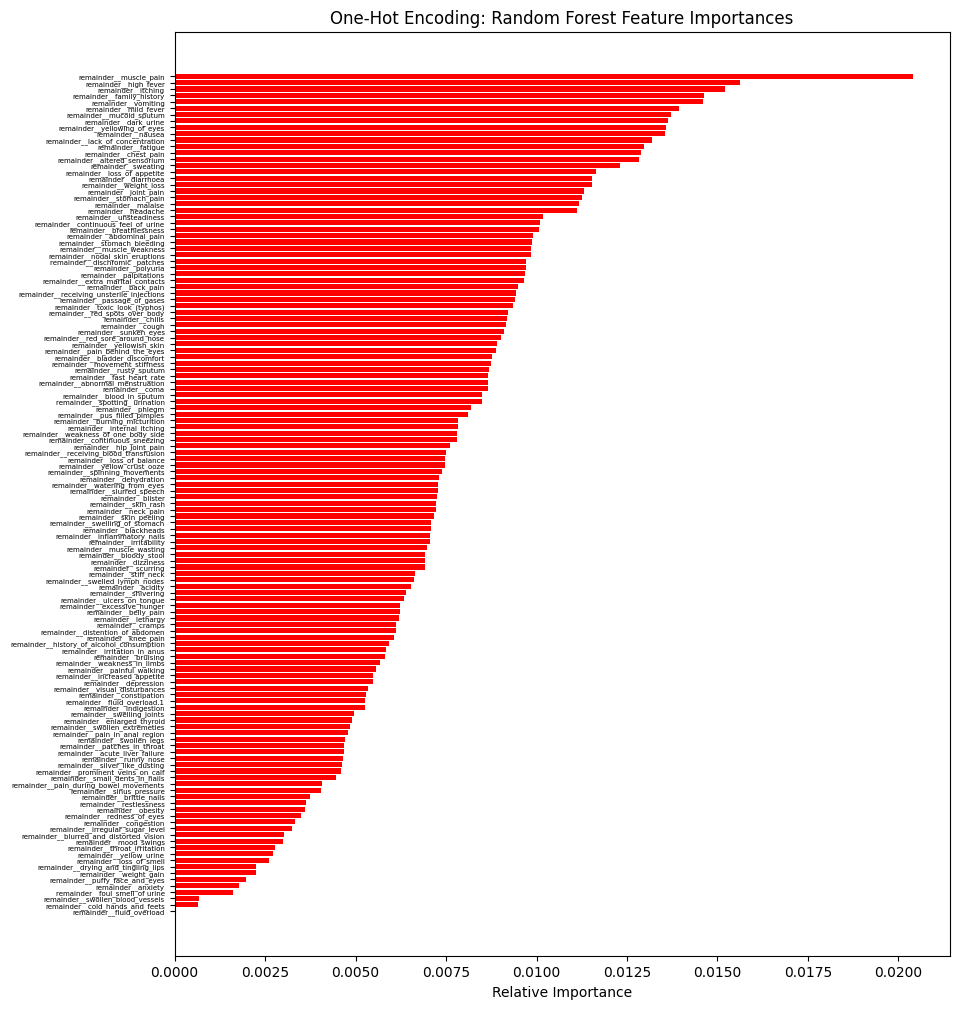

In [5]:
# Adjust the approach to remove 'prognosis' only if it's present in the list
categorical_features = train_data.columns[train_data.dtypes == object].tolist()
if 'prognosis' in categorical_features:
    categorical_features.remove('prognosis')

# Creating a column transformer with OneHotEncoder for categorical features
column_transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(), categorical_features)
], remainder='passthrough')

train_data_transformed = column_transformer.fit_transform(train_data.drop('prognosis', axis=1))
test_data_transformed = column_transformer.transform(test_data.drop('prognosis', axis=1))

# Recreate DataFrame from the transformed data and concatenate with target variable
train_data_transformed = pd.DataFrame(train_data_transformed, columns=column_transformer.get_feature_names_out())
train_data_transformed['prognosis'] = train_data['prognosis']

test_data_transformed = pd.DataFrame(test_data_transformed, columns=column_transformer.get_feature_names_out())
test_data_transformed['prognosis'] = test_data['prognosis']

# Prepare training and testing data
X_train = train_data_transformed.drop('prognosis', axis=1)
y_train = train_data_transformed['prognosis']
X_test = test_data_transformed.drop('prognosis', axis=1)
y_test = test_data_transformed['prognosis']

# Initialize and train the Decision Tree Classifier
one_hot_encoded_dtc_model = DecisionTreeClassifier()
one_hot_encoded_dtc_model.fit(X_train, y_train)
dtc_predictions = one_hot_encoded_dtc_model.predict(X_test)

# Initialize and train the Random Forest Classifier
one_hot_encoded_rfc_model = RandomForestClassifier()
one_hot_encoded_rfc_model.fit(X_train, y_train)
rfc_predictions = one_hot_encoded_rfc_model.predict(X_test)

# Evaluation Metrics
print("Decision Tree Classifier Report:")
print(classification_report(y_test, dtc_predictions))
print("Random Forest Classifier Report:")
print(classification_report(y_test, rfc_predictions))

# Export the above into CSV files.
dtc_report = classification_report(y_test, dtc_predictions, output_dict=True)
dtc_report_df = pd.DataFrame(dtc_report).transpose()
dtc_report_df.to_csv("evaluation/one_hot_encoded_dtc_evaluation.csv")

rfc_report = classification_report(y_test, rfc_predictions, output_dict=True)
rfc_report_df = pd.DataFrame(rfc_report).transpose()
rfc_report_df.to_csv("evaluation/one_hot_encoded_rfc_evaluation.csv")

# Save the models
joblib.dump(one_hot_encoded_dtc_model, 'production/one_hot_encoded_dtc_model.pkl')
joblib.dump(one_hot_encoded_rfc_model, 'production/one_hot_encoded_rfc_model.pkl')

# Feature Importance for Decision Tree
features = X_train.columns
importances = one_hot_encoded_dtc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title('One-Hot Encoding: Decision Tree Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/one_hot_encoded_dtc_feature_importances.png')
plt.show()

# Feature Importance for Random Forest
importances = one_hot_encoded_rfc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title('One-Hot Encoding: Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/one_hot_encoded_rfc_feature_importances.png')
plt.show()


/Users/saisurisetti/Documents/repo/disease-prediction-different-encodings/.venv/lib/python3.11/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00     

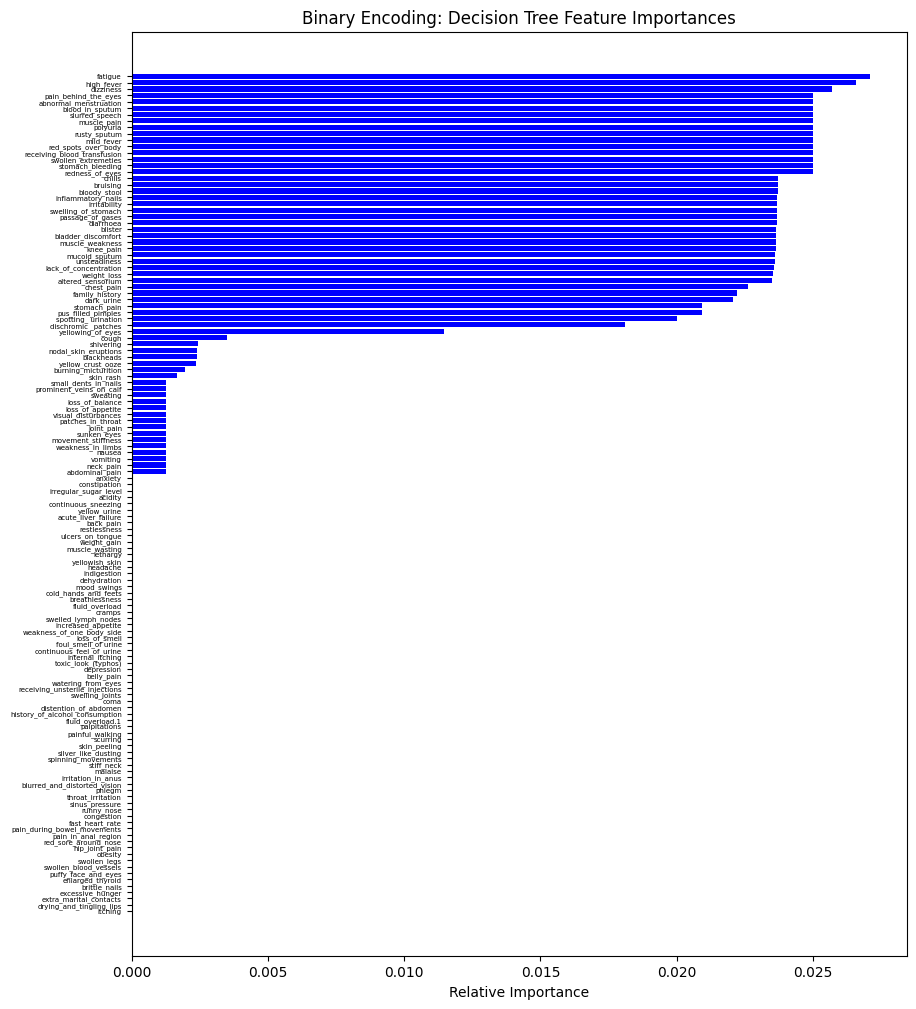

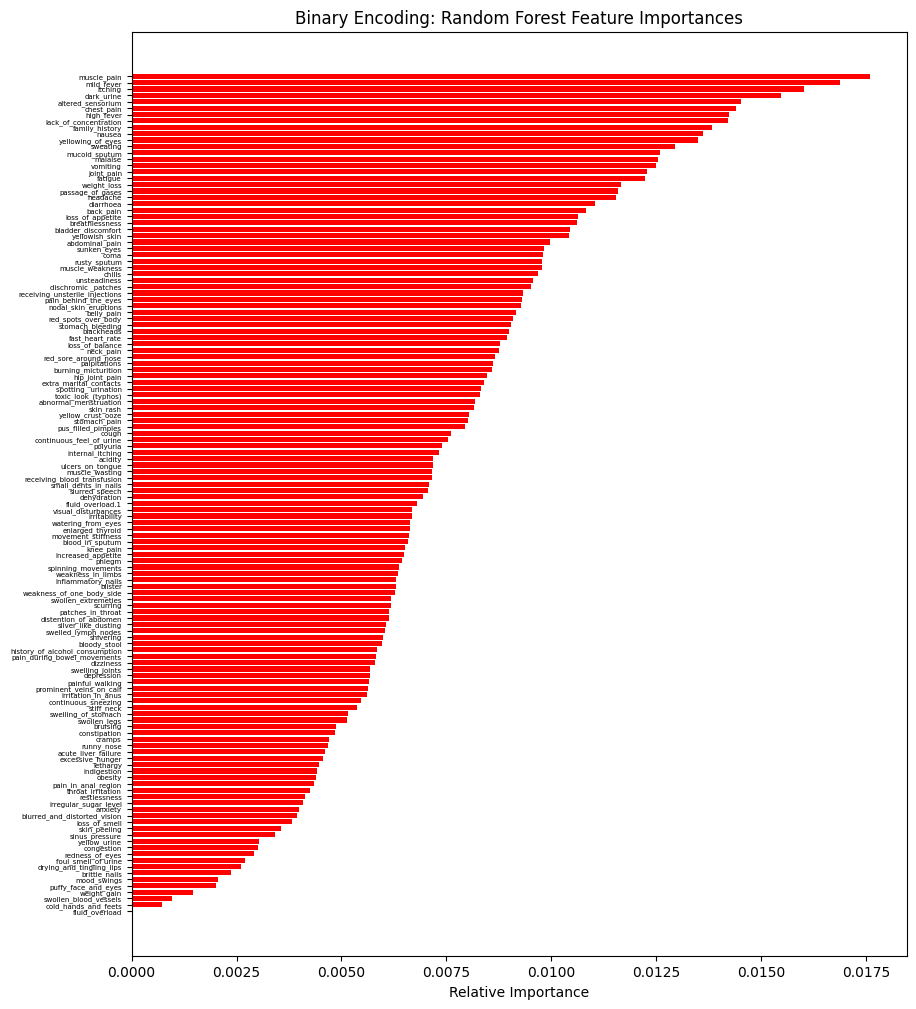

In [6]:
# Apply Binary Encoding
categorical_columns = train_data.select_dtypes(include=[object]).columns.tolist()  # Select only categorical columns
if 'prognosis' in categorical_columns:
    categorical_columns.remove('prognosis')  # Remove 'prognosis' safely if it's in the list

encoder = BinaryEncoder(cols=categorical_columns)  # Initialize encoder with the correct columns
train_encoded = encoder.fit_transform(train_data.drop('prognosis', axis=1))
test_encoded = encoder.transform(test_data.drop('prognosis', axis=1))

# Append 'prognosis' back after encoding
train_encoded['prognosis'] = train_data['prognosis']
test_encoded['prognosis'] = test_data['prognosis']

# Prepare training and testing data
X_train = train_encoded.drop('prognosis', axis=1)
y_train = train_encoded['prognosis']
X_test = test_encoded.drop('prognosis', axis=1)
y_test = test_encoded['prognosis']

# %%
# Initialize and train the Decision Tree Classifier
binary_encoded_dtc_model = DecisionTreeClassifier()
binary_encoded_dtc_model.fit(X_train, y_train)
dtc_predictions = binary_encoded_dtc_model.predict(X_test)

# Initialize and train the Random Forest Classifier
binary_encoded_rfc_model = RandomForestClassifier()
binary_encoded_rfc_model.fit(X_train, y_train)
rfc_predictions = binary_encoded_rfc_model.predict(X_test)

# %%
# Evaluation Metrics
print("Decision Tree Classifier Report:")
print(classification_report(y_test, dtc_predictions))
print("Random Forest Classifier Report:")
print(classification_report(y_test, rfc_predictions))

# Export the above into CSV files.
dtc_report = classification_report(y_test, dtc_predictions, output_dict=True)
dtc_report_df = pd.DataFrame(dtc_report).transpose()
dtc_report_df.to_csv("evaluation/binary_encoded_dtc_evaluation.csv")

rfc_report = classification_report(y_test, rfc_predictions, output_dict=True)
rfc_report_df = pd.DataFrame(rfc_report).transpose()
rfc_report_df.to_csv("evaluation/binary_encoded_rfc_evaluation.csv")

# Save the models
joblib.dump(binary_encoded_dtc_model, 'production/binary_encoded_dtc_model.pkl')
joblib.dump(binary_encoded_rfc_model, 'production/binary_encoded_rfc_model.pkl')

# %%
# Feature Importance for Decision Tree
features = X_train.columns
importances = binary_encoded_dtc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title('Binary Encoding: Decision Tree Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/binary_encoded_dtc_feature_importances.png')
plt.show()

# Feature Importance for Random Forest
importances = binary_encoded_rfc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title('Binary Encoding: Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=5)
plt.xlabel('Relative Importance')
plt.savefig('images_graphs/binary_encoded_rfc_feature_importances.png')
plt.show()

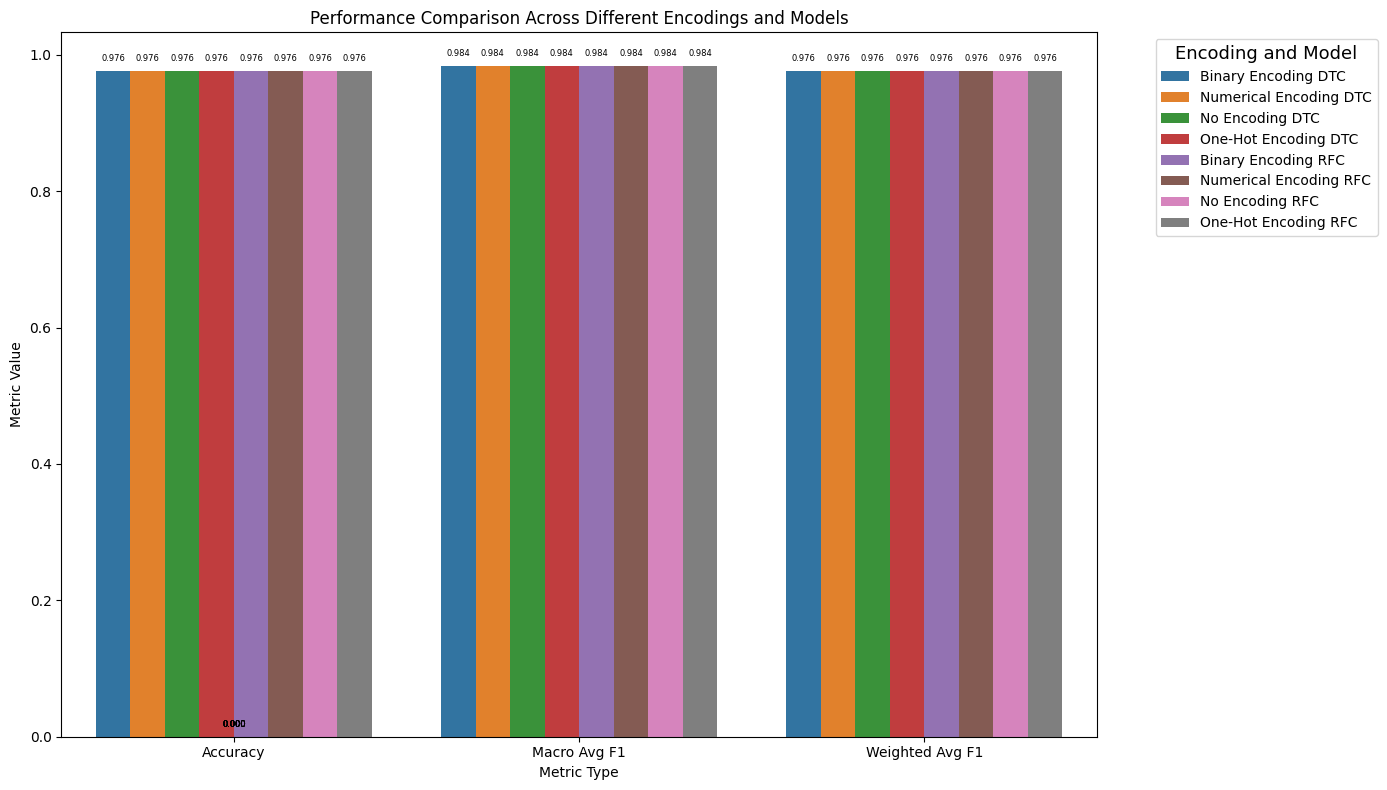

In [7]:
# Summary of the models

# Define the path to the evaluation files
eval_files = {
    'Binary Encoding DTC': 'evaluation/binary_encoded_dtc_evaluation.csv',
    'Numerical Encoding DTC': 'evaluation/numerical_encoded_dtc_evaluation.csv',
    'No Encoding DTC': 'evaluation/no_encoded_dtc_evaluation.csv',
    'One-Hot Encoding DTC': 'evaluation/one_hot_encoded_dtc_evaluation.csv',
    'Binary Encoding RFC': 'evaluation/binary_encoded_rfc_evaluation.csv',
    'Numerical Encoding RFC': 'evaluation/numerical_encoded_rfc_evaluation.csv',
    'No Encoding RFC': 'evaluation/no_encoded_rfc_evaluation.csv',
    'One-Hot Encoding RFC': 'evaluation/one_hot_encoded_rfc_evaluation.csv'
}

# Dictionary to hold the metrics
metrics = {}

# Load each file and extract necessary metrics
for key, file_path in eval_files.items():
    df = pd.read_csv(file_path, index_col=0)  # Set the first column as the index
    accuracy = df.loc['accuracy', 'f1-score']
    macro_avg_f1 = df.loc['macro avg', 'f1-score']
    weighted_avg_f1 = df.loc['weighted avg', 'f1-score']
    metrics[key] = [accuracy, macro_avg_f1, weighted_avg_f1]

# Convert the dictionary to a DataFrame for easier manipulation
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Macro Avg F1', 'Weighted Avg F1']).T
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Encoding and Model'}, inplace=True)

# Prepare the data for visualization
melted_metrics_df = pd.melt(metrics_df, id_vars=['Encoding and Model'], var_name='Metric', value_name='Value')

# Create the plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Metric', y='Value', hue='Encoding and Model', data=melted_metrics_df)

# Add labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.3f'),  # Format the value to 3 decimal places
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the label
                      ha='center', va='center',
                      size=6,
                      xytext=(0, 9),
                      textcoords='offset points')

plt.title('Performance Comparison Across Different Encodings and Models')
plt.ylabel('Metric Value')
plt.xlabel('Metric Type')
plt.legend(title='Encoding and Model', title_fontsize='13', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('images_graphs/all_models_encodings_evaluations.png')
plt.show()
